In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
import osmnx as ox

In [3]:
county_list = pd.read_csv("./Top10_in_counties_final_1212.csv")
# county_list

In [4]:
county_list["gap"] = ", "
county_list["for_loop"] = county_list["County"].astype(str) + county_list["gap"] + county_list["State"]
county_list = county_list[["ID", "Name", "Rank", "State", "County", "for_loop"]]
county_list

,ID,Name,Rank,State,County,for_loop
0,1,Great Smoky Mountains National Park,1,North Carolina,Swain county,"Swain county, North Carolina"
1,2,Great Smoky Mountains National Park,1,North Carolina,Haywood county,"Haywood county, North Carolina"
2,3,Great Smoky Mountains National Park,1,Tennessee,Sevier county,"Sevier county, Tennessee"
3,4,Great Smoky Mountains National Park,1,Tennessee,Blount county,"Blount county, Tennessee"
4,5,Great Smoky Mountains National Park,1,Tennessee,Cocke county,"Cocke county, Tennessee"
5,6,Saguaro National Park,2,Arizona,Pima county,"Pima county, Arizona"
6,7,Petrified Forest National Park,3,Arizona,Navajo county,"Navajo county, Arizona"
7,8,Petrified Forest National Park,3,Arizona,Apache county,"Apache county, Arizona"
8,9,Crater Lake National Park,4,Oregon,Klamath county,"Klamath county, Oregon"
9,10,Redwood National Park,5,California,Humboldt county,"Humboldt county, California"


In [5]:
# type(county_list['County_code'][0])

In [6]:
Swain_boundary = ox.geocode_to_gdf('Swain county, North Carolina')
Swain_boundary.head() 

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-83.95339 35.46024, -83.95318 35.459...",35.695889,35.279115,-83.15583,-83.953395,282946877,relation,2528747,35.45819,-83.466275,"Swain County, North Carolina, United States",boundary,administrative,0.922071


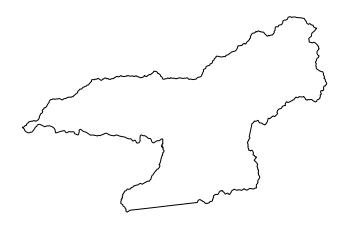

In [7]:
# Project it to Web Mercator first and plot
ax = Swain_boundary.to_crs(epsg=3857).plot(facecolor='none', edgecolor='black') 
ax.set_axis_off()

In [8]:
# Get all amenities in Swain County
Swain_amenities = ox.geometries_from_place("Swain county, North Carolina", tags={"amenity": True})
len(Swain_amenities)

373

In [9]:
Swain_amenities.amenity.unique()

array(['parking', 'place_of_worship', 'grave_yard', 'school', 'shelter',
       'fuel', 'fast_food', 'theatre', 'bench', 'toilets',
       'sanitary_dump_station', 'restaurant', 'bicycle_parking', 'cafe',
       'ice_cream', 'post_office', 'vending_machine', 'waste_basket',
       'bicycle_rental', 'shower', 'police', 'dressing_room', 'library',
       'atm', 'marketplace', 'arts_centre', 'ranger_station',
       'parking_space', 'hospital', 'fire_station', 'courthouse',
       'cinema', 'bank'], dtype=object)

In [10]:
Swain_features = ox.geometries_from_place("Swain county, North Carolina", tags={"amenity": ["restaurant", "fast_food", "parking", "parking_space"]}).reset_index()
Swain = Swain_features[["element_type", "osmid", "amenity", "source", "geometry"]]
Swain['county'] = 'Swain'
Swain.head()

C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to

,element_type,osmid,amenity,source,geometry,county
0,node,173501710,parking,NPS,POINT (-83.31066 35.56286),Swain
1,node,173532098,parking,NPS,POINT (-83.48180 35.56719),Swain
2,node,173536808,parking,NPS,POINT (-83.17948 35.57187),Swain
3,node,173539159,parking,NPS,POINT (-83.21142 35.62412),Swain
4,node,1264111556,fast_food,Yahoo,POINT (-83.42923 35.43292),Swain


In [11]:
county_list.head()

,ID,Name,Rank,State,County,for_loop
0,1,Great Smoky Mountains National Park,1,North Carolina,Swain county,"Swain county, North Carolina"
1,2,Great Smoky Mountains National Park,1,North Carolina,Haywood county,"Haywood county, North Carolina"
2,3,Great Smoky Mountains National Park,1,Tennessee,Sevier county,"Sevier county, Tennessee"
3,4,Great Smoky Mountains National Park,1,Tennessee,Blount county,"Blount county, Tennessee"
4,5,Great Smoky Mountains National Park,1,Tennessee,Cocke county,"Cocke county, Tennessee"


In [12]:
features = pd.DataFrame()
features_all = pd.DataFrame()

In [13]:
# test Alaska
#amenities1 = ox.geometries_from_place("Lake and Peninsula, Alaska", tags={"amenity": True})
#amenities2 = ox.geometries_from_place("Kodiak Island, Alaska", tags={"amenity": True})
#amenities3 = ox.geometries_from_place("Kenai Peninsula, Alaska", tags={"amenity": True})
#amenities4 = ox.geometries_from_place("Bristol Bay borough, Alaska", tags={"amenity": True})
amenities5 = ox.geometries_from_place("Montezuma, Colorado", tags={"amenity": True})

C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [14]:
#amenities4

In [15]:
for i in county_list["for_loop"]:
    features = ox.geometries_from_place(i, tags={"amenity": ["restaurant", "fast_food", "parking", "parking_space"]}).reset_index()
    features = features[["element_type", "osmid", "amenity", "geometry"]]
    features['county'] = i
    features_all = features_all.append(features)

C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored wh

C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored wh

C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiPolygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\CSS\miniconda3\envs\musa-550-fall-2021\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored wh

In [16]:
features_all = features_all.reset_index()
features_all

,index,element_type,osmid,amenity,geometry,county
0,0,node,173501710,parking,POINT (-83.31066 35.56286),"Swain county, North Carolina"
1,1,node,173532098,parking,POINT (-83.48180 35.56719),"Swain county, North Carolina"
2,2,node,173536808,parking,POINT (-83.17948 35.57187),"Swain county, North Carolina"
3,3,node,173539159,parking,POINT (-83.21142 35.62412),"Swain county, North Carolina"
4,4,node,1264111556,fast_food,POINT (-83.42923 35.43292),"Swain county, North Carolina"
...,...,...,...,...,...,...
31999,1809,relation,10713851,parking,"POLYGON ((-118.82931 34.20751, -118.82952 34.2...","Ventura county, California"
32000,1810,relation,12437716,parking,"POLYGON ((-118.82309 34.15341, -118.82316 34.1...","Ventura county, California"
32001,1811,relation,13218453,parking,"MULTIPOLYGON (((-118.88546 34.18335, -118.8866...","Ventura county, California"
32002,1812,relation,13259910,parking,"MULTIPOLYGON (((-118.85170 34.20060, -118.8517...","Ventura county, California"


In [17]:
# features_all[:813]

In [18]:
for i in range(0, len(features_all)):
    if features_all["amenity"][i]=='parking_space':
        features_all["amenity"][i]='parking'
    
    if features_all["amenity"][i]=='fast_food':
        features_all["amenity"][i]='restaurant'

C:\Users\CSS\AppData\Local\Temp/ipykernel_11416/1752088746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_all["amenity"][i]='restaurant'
C:\Users\CSS\AppData\Local\Temp/ipykernel_11416/1752088746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_all["amenity"][i]='parking'


In [19]:
features_all.amenity.unique()

array(['parking', 'restaurant'], dtype=object)

In [20]:
features_all

,index,element_type,osmid,amenity,geometry,county
0,0,node,173501710,parking,POINT (-83.31066 35.56286),"Swain county, North Carolina"
1,1,node,173532098,parking,POINT (-83.48180 35.56719),"Swain county, North Carolina"
2,2,node,173536808,parking,POINT (-83.17948 35.57187),"Swain county, North Carolina"
3,3,node,173539159,parking,POINT (-83.21142 35.62412),"Swain county, North Carolina"
4,4,node,1264111556,restaurant,POINT (-83.42923 35.43292),"Swain county, North Carolina"
...,...,...,...,...,...,...
31999,1809,relation,10713851,parking,"POLYGON ((-118.82931 34.20751, -118.82952 34.2...","Ventura county, California"
32000,1810,relation,12437716,parking,"POLYGON ((-118.82309 34.15341, -118.82316 34.1...","Ventura county, California"
32001,1811,relation,13218453,parking,"MULTIPOLYGON (((-118.88546 34.18335, -118.8866...","Ventura county, California"
32002,1812,relation,13259910,parking,"MULTIPOLYGON (((-118.85170 34.20060, -118.8517...","Ventura county, California"


In [21]:
features_count = features_all.groupby(["county", "amenity"]).count().reset_index()
features_count["number"] = features_count["index"]
features_count = features_count[["county", "amenity", "number"]]
features_count

,county,amenity,number
0,"Apache county, Arizona",parking,134
1,"Apache county, Arizona",restaurant,32
2,"Blount county, Tennessee",parking,296
3,"Blount county, Tennessee",restaurant,72
4,"Bristol Bay, Alaska",parking,7
5,"Bristol Bay, Alaska",restaurant,2
6,"Cocke county, Tennessee",parking,23
7,"Cocke county, Tennessee",restaurant,26
8,"Coconino county, Arizona",parking,838
9,"Coconino county, Arizona",restaurant,253


In [22]:
features_all.to_csv('osm_features_all.csv')
features_count.to_csv('osm_features_count.csv')